In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Столбцы, содержащих мало данных, удаляем

In [5]:
train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

удаляем строки с отсутствующими значениями

In [6]:
train.dropna(inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

In [8]:
data = pd.get_dummies(train)

Разделим данные на Х и У

In [9]:
X = data.drop(['SalePrice'], axis=1)
Y = data.SalePrice

Разделим данные на тренировочные и тестовые

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

__Случайный лес и важность признаков__

In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Считаем ошибку

In [12]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(x_test, y_test))

MAE 18998.991415525114
MSE 820480353.3329351
RMSE 28644.02823160414
Score: 0.8909281750955667


Точность неплохая - 89,1%

Попробуем задать какие-нибудь параметры для случайного леса

In [13]:
model_1 = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20)
model_1.fit(x_train, y_train) 
y_pred = model_1.predict(x_test)

In [14]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model_1.score(x_test, y_test))

MAE 25242.50353686559
MSE 1606886464.6258807
RMSE 40085.9883827988
Score: 0.7863860622633844


Точность значительно хуже.

Важность критериев

In [15]:
dt = pd.DataFrame(X.columns, model.feature_importances_).reset_index()
dt.columns = ['importance', 'name']
dt_imp = dt.loc[dt['importance'] > 0.01]
dt_imp

,importance,name
4,0.748491,OverallQual
9,0.013303,BsmtFinSF1
12,0.022422,TotalBsmtSF
13,0.032198,1stFlrSF
16,0.096727,GrLivArea
19,0.012101,FullBath
26,0.025548,GarageCars


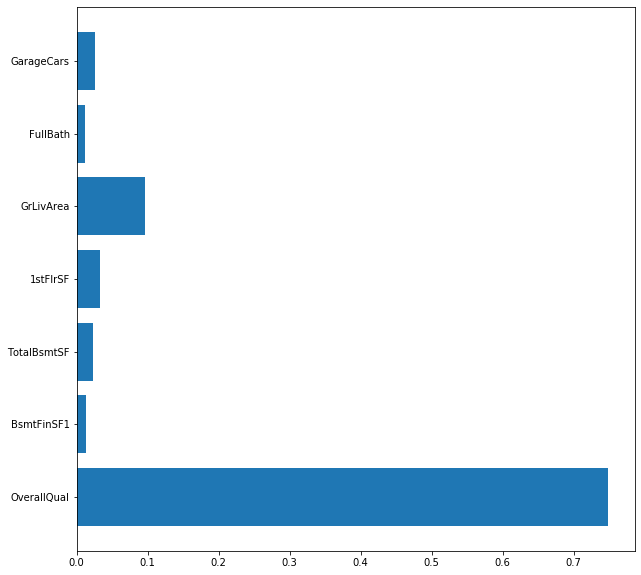

In [16]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
plt.barh(np.arange(len(dt_imp.importance)), dt_imp.importance)
plt.yticks(np.arange(len(dt_imp.name)),dt_imp.name)
plt.show()

Попробуем случайный лес только с важными критериями

In [17]:
X = data[['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
Y = data.SalePrice

In [18]:
model_2 = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20)
model_2.fit(x_train, y_train) 
y_pred = model_2.predict(x_test)

In [19]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model_2.score(x_test, y_test))

MAE 25248.893428699525
MSE 1629772899.367686
RMSE 40370.44586535658
Score: 0.7833436186598238


Нет, качество стало только хуже.

Значит, выбираю Случайное дерево со всеми столбцами (первую модель)

__Стэкинг 3х моделей__

In [20]:
X = data.drop(['SalePrice'], axis=1)
Y = data.SalePrice

In [21]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [22]:
sr = StackingRegressor(
    [
        ('rf', RandomForestRegressor()),
        ('dt', DecisionTreeRegressor(),
         'lr', LinearRegression())
    ],
DecisionTreeRegressor())

In [23]:
sr.fit(x_train, y_train)
y_pred = sr.predict(x_test)

In [24]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(x_test, y_test))

MAE 29980.853881278537
MSE 3105424092.8812785
RMSE 55726.33213195785
Score: 0.7833436186598238


Данные так себе - 78,3%

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
Xhold = data.drop(['SalePrice'], axis=1)
Yhold = data.SalePrice

In [31]:
# выведем оценку качества для простого случайного леса
np.mean(cross_val_score(model, Xhold, Yhold, cv=10))

0.8511301841567402

In [29]:
# выведем оценку качества для стекинга
np.mean(cross_val_score(sr, Xhold, Yhold, cv=10))

0.6439369627822009

__Валидация модели 2-го уровня__

Случайный лес(model) + Дерево решений + Lasso

In [32]:
#Дерево решений
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [33]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", dt_model.score(x_test, y_test))

MAE 29504.23287671233
MSE 2001186745.8219178
RMSE 44734.62580397782
Score: 0.7339691444716533


In [35]:
#Lasso
from sklearn.linear_model import Lasso
ls = Lasso()

In [36]:
ls.fit(x_train, y_train)
y_pred = ls.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196737964148.83224, tolerance: 591212578.2300007
  positive)


In [37]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", ls.score(x_test, y_test))

MAE 17885.078167724674
MSE 664375245.4260882
RMSE 25775.477598409077
Score: 0.911680249081419


Объединяем все три модели

In [41]:
from sklearn.model_selection import StratifiedKFold

In [42]:
cv = StratifiedKFold(n_splits=10)

In [43]:
def get_all_features(clf, x_train, y_train, x_test, stack_cv):
    all_train = np.zeros_like(y_train, dtype=float) 
    all_test = np.zeros(x_test.shape[0], dtype=float) 
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(x_train, y_train)): 
        
        clf.fit(x_train.iloc[train_ind], y_train.iloc[train_ind])
        all_train[test_ind] = clf.predict(x_train.iloc[test_ind])
        all_test += clf.predict(x_test)
    
    return all_train, all_test / stack_cv.n_splits

In [38]:
all_models = [model, dt_model, ls]

In [44]:
all_train = []
all_test = []
for i in all_models:
    all_tr, all_te = get_all_features(i, x_train, y_train, x_test, cv)
    all_train.append(all_tr)
    all_test.append(all_te)

    
col_names = ['random_forest', 'decision_tree', 'lasso']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187861937697.36832, tolerance: 530076949.4811465
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

In [45]:
x_train_all = pd.DataFrame(np.stack(all_train, axis=1), columns=col_names)
x_test_all = pd.DataFrame(np.stack(all_test,axis=1), columns=col_names)

Собираем гипермодель

In [46]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression(n_jobs=-1)

In [47]:
clf.fit(x_train_all, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [50]:
y_pred_all = clf.predict(x_test_all)

In [51]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred_all))
print("MSE", metrics.mean_squared_error(y_test, y_pred_all))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred_all)))
print("Score:", clf.score(x_test_all, y_test))

MAE 16873.382055020287
MSE 696490933.0735061
RMSE 26391.11466144441
Score: 0.9074109004668723
